## Visualize the A2C Agent
This notebook is for visualizing the A2C agent playing the pacman game and making sure that model is working. This is not for visualizing the imagination augmented agent. 

First start off by importing the necessary modules.

In [1]:
import numpy as np
import os
from a2c import get_actor_critic
import env_model
from common.minipacman import MiniPacman
import tensorflow as tf
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

Next create our environment. We want don't want to have multiprocessing (hence `nenvs=1`) 

In [2]:
nenvs = 1
nsteps=5

done = False
env = MiniPacman('regular', 1000)
ob_space = env.observation_space.shape
nw, nh, nc = ob_space
ac_space = env.action_space

states = env.reset()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Helper function to display an image to the Jupyter Notebook so we can see the game being played in our browser

In [3]:
import time 

def displayImage(image, step, reward):
    clear_output(True)
    s = "step: " + str(step) + " reward: " + str(reward)
    plt.figure(figsize=(10,3))
    plt.title(s)
    plt.imshow(image)
    plt.show()
    time.sleep(0.1)

Load in the saved weights and see the game being played! Replace the weights I saved with whatever you want to use.

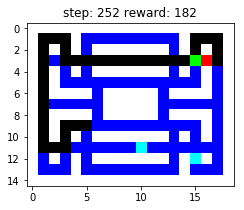

total reward 182


In [4]:
with tf.Session() as sess:
    actor_critic = get_actor_critic(sess, nenvs, nsteps, ob_space, ac_space)
    actor_critic.load('/Users/andrewszot/Downloads/weights/model_100000.ckpt')

    total_reward = 0
    step = 0

    while not done:
        states = np.expand_dims(states, 0)
        actions, values, _ = actor_critic.act(states)

        states, reward, done, _ = env.step(actions[0])

        total_reward += reward
        
        displayImage(states, step, total_reward)
        step += 1

    print('total reward', total_reward)